## Understanding the potential of geospatial vector data in Python
Data source: [https://data.lexingtonky.gov/dataset](https://data.lexingtonky.gov/dataset)

### Table of Contents
 - read shapefile data directly from the zip file
 - display basic info about the dataframe
 - 

In [47]:
# load libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from pandas_summary import DataFrameSummary

#### read shapefile data directly from the zip file

In [48]:
df_parcels= gpd.read_file("zip://./data/parcel.zip")

#### display basic info about the dataframe

In [41]:
df_parcels.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 111367 entries, 0 to 111366
Data columns (total 18 columns):
OBJECTID      111367 non-null int64
PVANUM        111356 non-null object
NUM1          111308 non-null object
NUM2          1995 non-null object
DIR           5504 non-null object
NAME          111360 non-null object
TYPE          109212 non-null object
ADDRESS       111359 non-null object
UNIT          6631 non-null object
TAX           111016 non-null object
CLASS         111016 non-null object
PVA_ACRE      111367 non-null float64
CONDO         11085 non-null object
CAB_SLIDE     89313 non-null object
DATEENTRD     71863 non-null object
Shape_Leng    111367 non-null float64
Shape_Area    111367 non-null float64
geometry      111367 non-null object
dtypes: float64(3), int64(1), object(14)
memory usage: 15.3+ MB


#### get some basic info about the dataframe from .head
The 'geometry' column reveals the parcels are represented as polygons

In [42]:
df_parcels.head()

,OBJECTID,PVANUM,NUM1,NUM2,DIR,NAME,TYPE,ADDRESS,UNIT,TAX,CLASS,PVA_ACRE,CONDO,CAB_SLIDE,DATEENTRD,Shape_Leng,Shape_Area,geometry
0,1,None,327,None,None,CANE VIEW,TRL,327 CANE VIEW TRL,None,None,None,0.0,None,None,None,191.386306,1496.679371,POLYGON ((-84.56182518593556 38.08308923294327...
1,2,None,1821,None,None,ALYSHEBA,WAY,1821 ALYSHEBA WAY,None,None,None,0.0,None,R-815,2018-07-30,1133.907512,66200.655303,"POLYGON ((-84.42010040525781 38.0181823020032,..."
2,3,None,329,None,None,CANE VIEW,TRL,329 CANE VIEW TRL,None,None,None,0.0,None,None,None,202.614523,1923.338801,POLYGON ((-84.56176947038908 38.08314299222445...
3,4,None,335,None,None,CANE VIEW,TRL,335 CANE VIEW TRL,None,None,None,0.0,None,None,None,191.386306,1496.679371,"POLYGON ((-84.5615564425276 38.08291522963526,..."
4,5,None,343,None,None,CANE VIEW,TRL,343 CANE VIEW TRL,None,None,None,0.0,None,None,None,191.998970,1519.983396,"POLYGON ((-84.5611301992457 38.08277786937636,..."


#### the .plot() method produces a basic map of the data 

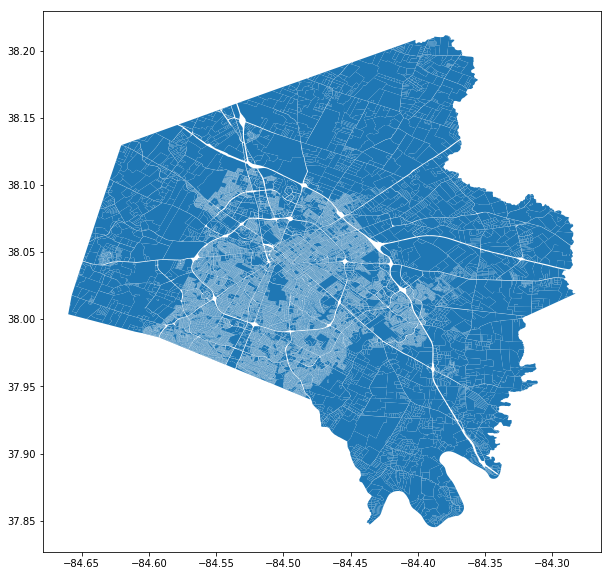

In [43]:
df_parcels.plot(figsize=(10,10));

In [50]:
df_parcels['TAX'].unique()

array([None, '01', '04', '06', '03', '05', '02', '07'], dtype=object)

There are some null records in the TAX column, fill-em with string 'ND'

In [51]:
df_parcels['TAX'].fillna(value='ND', inplace=True)
taxcodes=df_parcels['TAX'].unique()
taxcodes.sort()
print(taxcodes)

['01' '02' '03' '04' '05' '06' '07' 'ND']


__Add a little color__ using __cmap__ [more info here](https://matplotlib.org/gallery/color/colormap_reference.html)  
Add a title  
Turn off axis  
Save to png  

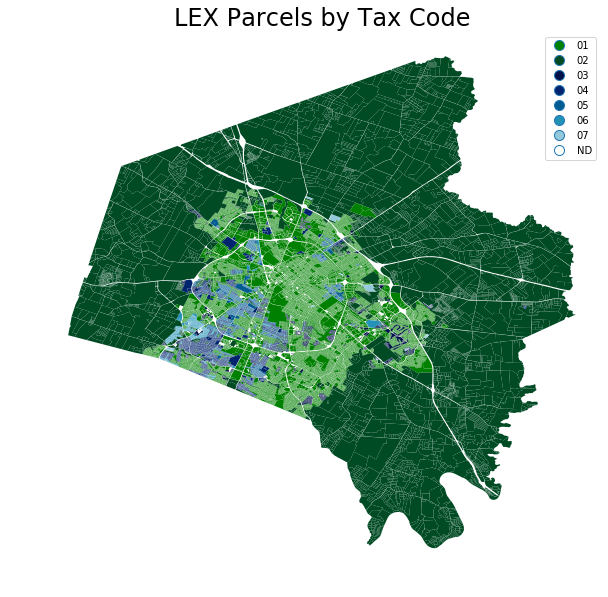

In [77]:
df_parcels.plot(column='TAX', figsize=(10,10), cmap='ocean', legend=True);
plt.title('LEX Parcels by Tax Code', fontdict={'fontsize': 24});
plt.axis('off')
plt.savefig('images/LEX-parcels-tax-code.png', format='png');

#### Get the centroid points of the polygons

In [47]:
df_parcels['x'] = df_parcels.centroid.map(lambda p: p.x)
df_parcels['y'] = df_parcels.centroid.map(lambda p: p.y)
#print(df_parcels['x'].head(), df_parcels['y'].head())

***

## Address Point Data

In [14]:
df_addrpts = gpd.read_file("zip://./data/addresspoint.zip")
df_addrpts.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 179497 entries, 0 to 179496
Data columns (total 17 columns):
OBJECTID      179497 non-null int64
STADD         179497 non-null int64
STDIR         14867 non-null object
STNAME        179497 non-null object
STTYPE        173890 non-null object
UNIT          67519 non-null object
TYPE          179497 non-null object
STFULLNAME    179489 non-null object
NEWDATE       179494 non-null object
UPDATE_       137880 non-null object
ADDRESS       179497 non-null object
Active        179497 non-null object
Retired       179495 non-null object
Source        179497 non-null object
created_by    174713 non-null object
last_edite    171071 non-null object
geometry      179497 non-null object
dtypes: int64(2), object(15)
memory usage: 23.3+ MB


#### Extract the lat lon data from geometry into separate columns

In [15]:
df_addrpts['lon'] = df_addrpts.geometry.apply(lambda p: p.x)
df_addrpts['lat'] = df_addrpts.geometry.apply(lambda p: p.y)
df_addrpts.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 179497 entries, 0 to 179496
Data columns (total 19 columns):
OBJECTID      179497 non-null int64
STADD         179497 non-null int64
STDIR         14867 non-null object
STNAME        179497 non-null object
STTYPE        173890 non-null object
UNIT          67519 non-null object
TYPE          179497 non-null object
STFULLNAME    179489 non-null object
NEWDATE       179494 non-null object
UPDATE_       137880 non-null object
ADDRESS       179497 non-null object
Active        179497 non-null object
Retired       179495 non-null object
Source        179497 non-null object
created_by    174713 non-null object
last_edite    171071 non-null object
geometry      179497 non-null object
lon           179497 non-null float64
lat           179497 non-null float64
dtypes: float64(2), int64(2), object(15)
memory usage: 26.0+ MB


#### create a new dataframe from df_addrpts with geometry dropped
This is being done so the data can be used by DataFrameSummary which can not process the geometry

***Create a new column called `type_description` to more easily identify the address type***  
*Note: type = 'C', '35', and 'P' will be ignored as there are only 1 address for each type.

In [16]:
type_list = []               # empty list

for item in df_addrpts['TYPE']:       # loop through the column 'type'. On match, append the descriptive word to the list
    if item == 'R':           
        type_list.append('Residential')
    elif item == 'O':
        type_list.append('Commercial')
    elif item == 'V':
        type_list.append('Vacant')
    elif item == 'U':
        type_list.append('Utility')
    else:
        type_list.append('unknown')

td = pd.Series(type_list)   #convert the list into a Series
df_addrpts['type_description'] = td.values      # add the Series values to the DataFrame


In [18]:
df_short = df_addrpts.drop(['geometry'], axis=1)
dfs = DataFrameSummary(df_short)
dfs.columns_stats

,OBJECTID,STADD,STDIR,STNAME,STTYPE,UNIT,TYPE,STFULLNAME,NEWDATE,UPDATE_,ADDRESS,Active,Retired,Source,created_by,last_edite,lon,lat,type_description
counts,179497,179497,14867,179497,173890,67519,179497,179489,179494,137880,179497,179497,179495,179497,174713,171071,179497,179497,179497
uniques,179497,5823,4,3631,30,5430,11,4124,2166,2251,179198,1,1,2,14,20,179406,179406,5
missing,0,0,164630,0,5607,111978,0,8,3,41617,0,0,2,0,4784,8426,0,0,0
missing_perc,0%,0%,91.72%,0%,3.12%,62.38%,0%,0.00%,0.00%,23.19%,0%,0%,0.00%,0%,2.67%,4.69%,0%,0%,0%
types,numeric,numeric,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,constant,constant,bool,categorical,categorical,numeric,numeric,categorical


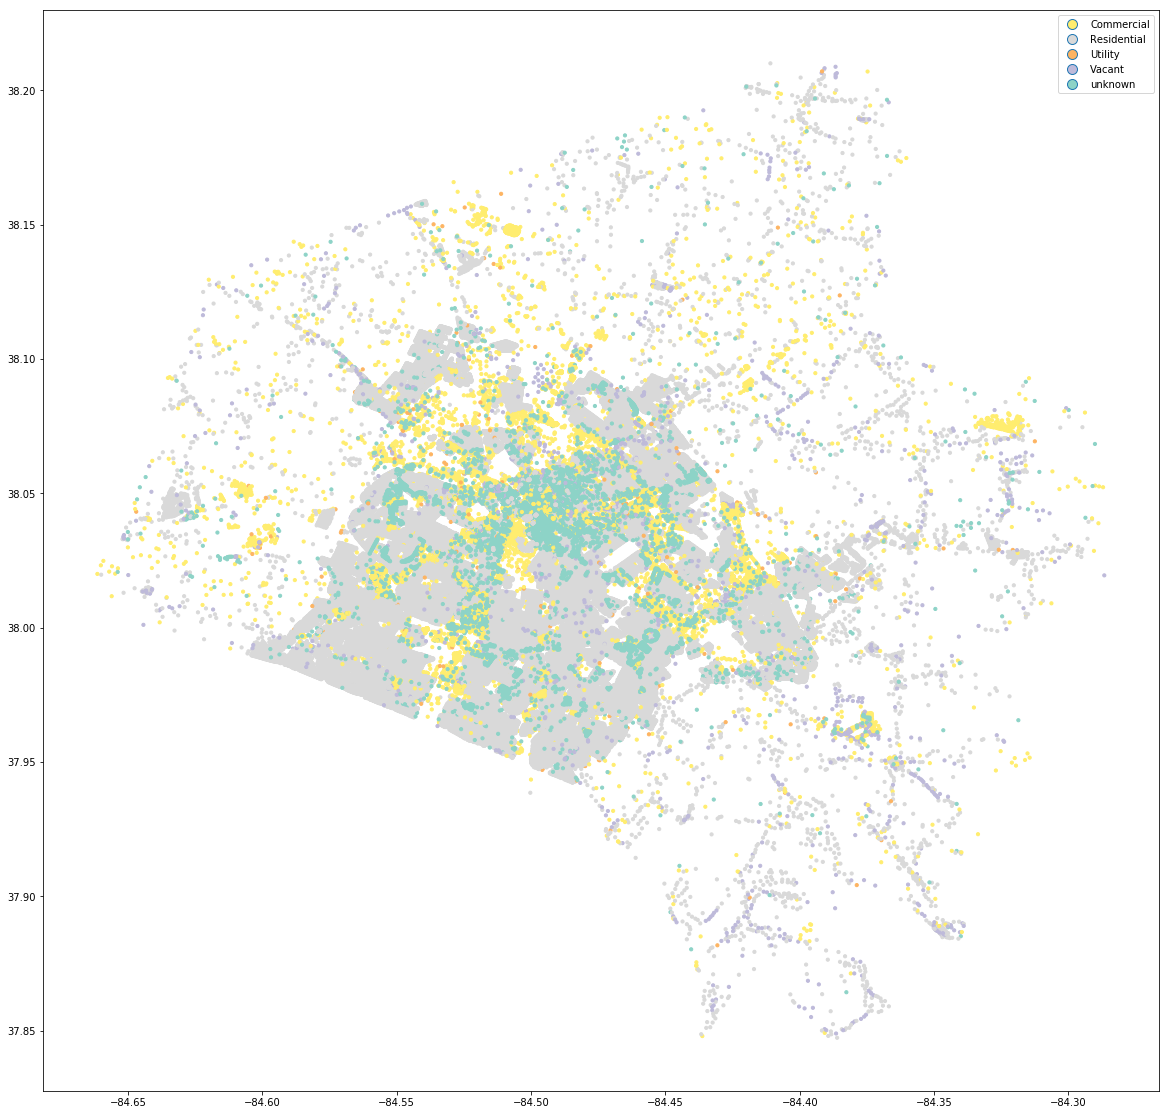

In [45]:
df_addrpts.plot(column='type_description', figsize=(20,20), cmap='Set3_r', markersize=10, legend=True);

## create a single map overlaying the parcels with the points

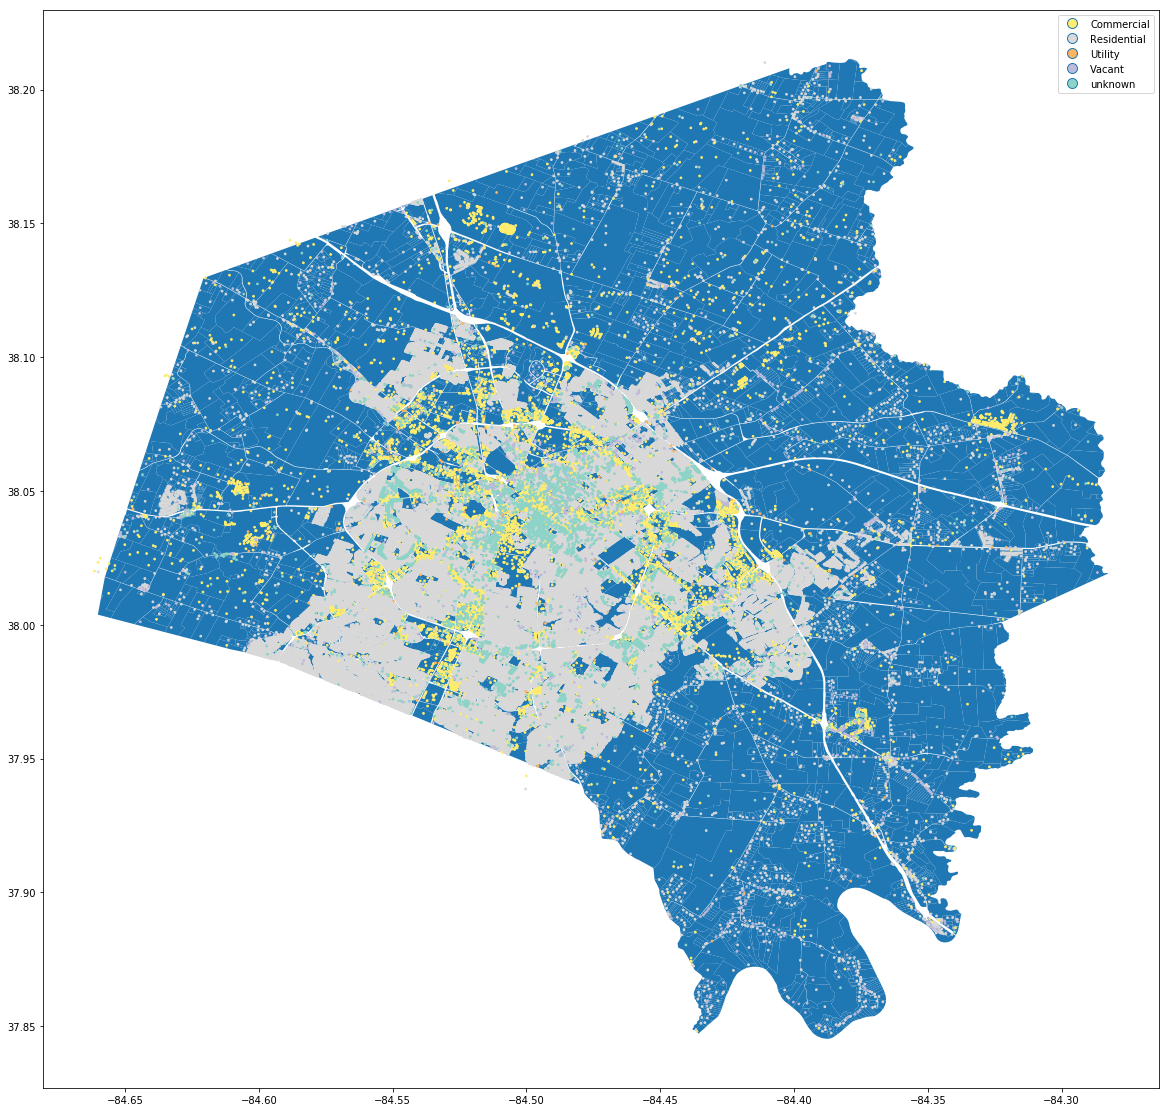

In [74]:
fig, ax = plt.subplots(figsize=(20,20))    #size the figure
# Set aspect to equal.This is done automatically when using geopandas plot on it's own, but not when working with pyplot directly.
ax.set_aspect('equal')
df_parcels.plot(ax=ax)
df_addrpts.plot(column='type_description', ax=ax, cmap='Set3_r', markersize=3, legend=True);